### **Please submit the different parts of Module 3 in separate notebooks.**

**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 3 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Name*: Khai Nguyen

*Email*: khailuu.nguyen@sjsu.edu

*I plan to take the next available Module 3 Assessment*: **Yes**

# Module 3, Part 1

Please complete this assignment in a Colab.  

Please submit all parts of the Module 3 assignment as separate notebooks in the Canvas assignment for Module 3 ("Module 3 Assignment").

# Section 0: Initialization 

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from google.colab import drive

In [ ]:
# mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data
df = pd.read_csv("/content/drive/MyDrive/Datasets/Sample_Data_m3.csv")
df.head(3)

,Unnamed: 0,a,b,target
0,0,664159,550946,1
1,1,665845,557965,1
2,2,597173,575538,1


In [ ]:
df['target'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

# Section 1: Visualization & Pre-Processing

### 1\. Plot scatter plot with data from column 'a' on the x-axis, the data from column 'b' as the y-axis, and the data from the 'target' column as the color parameter (parameter 'c')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


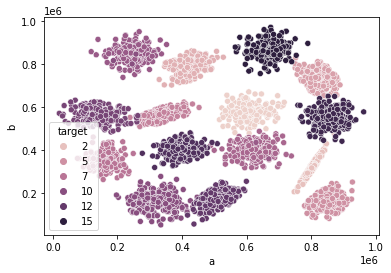

In [ ]:
sns.scatterplot(df['a'], df['b'], hue = df['target'])

### 2\. Split dataset into training and test set & reset the indices of each output dataframe

Notes:
* Reset the index columns for each of the four dataframes output by the train_test_split below (x_train, x_test, y_train, y_test) so that it contains consecutive numbers starting at 0.

* Use a small test set while you are still experimenting since the classification step is time consuming.  You can use a larger one, e.g., 25% once you are ready to plot the confusion matrix at the end of the assignment.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[["a","b"]], df["target"], test_size = 0.25 , random_state = 100)
print(x_train.head(5))

           a       b
1264  828179  155649
1662  352520  566829
98    606929  571420
2347  603193  371867
749   407565  766203


### 3\.  Add a "target" column to x_train and store the y_train values there

In [ ]:
x_train['target'] = y_train.copy()

# Section 3: KNN Algorithm Implementation

### 1\. Implement a function euclidean_dist(p1,p2) that returns the euclidean distance between two numpy arrays, p1 and p2. 

In [ ]:
# each numpy array will have only 1 row
def euclidean_dist(p1, p2):
    dif = (p1 - p2)
    return math.sqrt(np.sum(dif**2))

In [ ]:
# test
a = np.array([5,1])
b = np.array([3,1])

dif_test = euclidean_dist(a,b)
dif_test

2.0

### 2\. Implement a function get_closest_neighbors(training_data, test_object, k) which returns the k nearest neighbors to the test object (nearest neighbors from  the training data 

* The function accepts as arguments a numpy matrix (training_data), a test object (a numpy array), and the parameter k.

* The function returns k vectors (the k nearest neighbor to the test object)

* The distance computation is performed using the euclidean_dist() function you wrote in the exercise above.

* The distance computation needs to use the "a" and "b" column values for both a training object and the test object when computing the distance between them (print out the contents of the different variables to make sure you are using the right data) 


In [ ]:
# training_data is the whole training data with lots of rows and test_object is one object
def get_closest_neighbors(training_data, test_object, k):
  distances = []
  k_closest_neighbors = []

  # exclude the target column, the third column of training_data
  # pass test_object.to_numpy() for easy minus
  for i in range(len(training_data)):
    distances.append(euclidean_dist(training_data[i, :2], test_object.to_numpy()))

  # convert to numpy for future manipulation
  distances = np.array(distances)

  # argsort: https://opensourceoptions.com/blog/sort-numpy-arrays-by-columns-or-rows/
  # argsort will return the index from smallest to highest
  indexes = distances.argsort()

  # get training_data of k smallest instances
  k_closest_neighbors = training_data[indexes[:k]]

  return k_closest_neighbors

### 3\. Implement a classification function

Given a set of neighbors, compute what class do the majority of them belong to, using a voting strategy (e.g., each neighbor votes for the class that it belongs to)

Notes:

* You may find the following functions helpful: np.bincount, np.argmax


In [ ]:
def knn_classify(neighbors):
  # this third column has the target
  freq = np.bincount(neighbors[:, 2])
  return np.argmax(freq)

In [ ]:
a = [1,2,1,1,2]
freq = np.bincount(a)
freq

array([0, 3, 2])

In [ ]:
np.argmax(freq)

1

**Use your KNN classifer to classify the test samples in your dataset**
(you do not need to add code here)

In [ ]:
y_test_pred = []
k = 10

for i in tqdm(range(len(x_test))):
  # find k closest neighbors
  k_neighbors = get_closest_neighbors(x_train.to_numpy(), x_test.iloc[i,:2], k)
  # compute the class for the test object
  test_object_class = knn_classify(k_neighbors)
  # add the prediction to the list of predictions y_test_pred 
  y_test_pred.append(test_object_class)

100%|██████████| 1250/1250 [01:21<00:00, 15.41it/s]


### 4\. Compute the confusion matrix for the above predictions

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels= df['target'].unique())

### 5\. Use the ConfusionMatrixDisplay.from_predictions function to plot a confusion matrix heatmap

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

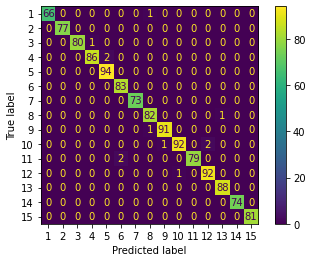

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = df['target'].unique()).plot()

> If I don't include labels like above, for some reason the index will be from 0 to 14, even though my test and test prediction don't start at 0

In [ ]:
cm1 = confusion_matrix(y_test, y_test_pred)

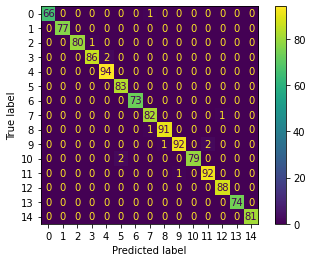

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm1).plot()

In [ ]:
y_test[y_test == 0]

Series([], Name: target, dtype: int64)

> As we can see above, no 0 value